In [1]:

import pandas as pd

# Load course application data
file_path = "../data/course/inkomna-ansokningar-2024-for-kurser.xlsx"
df = pd.read_excel(file_path)




In [2]:
df.head()

,Diarienummer,Anordnare namn,Utbildningsnamn,Sökt utbildningsområde,Sökt antal platser 2024,Sökt antal platser 2024 (start och avslut 2024),Sökt antal platser 2025,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
0,MYH 2024/1000,Changemaker Educations AB,Futuregames Accessible Game Production,Data/IT,35,0,35,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
1,MYH 2024/1001,Changemaker Educations AB,Futuregames Inclusive Game Development,Data/IT,35,0,35,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
2,MYH 2024/1002,Båstads kommun Akademi Båstad,Ekosystemtjänster i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",25,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
3,MYH 2024/1003,Båstads kommun Akademi Båstad,Hållbar dagvattenhantering i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",25,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
4,MYH 2024/1004,Båstads kommun Akademi Båstad,Invasiva växter i utemiljöer,"Lantbruk, djurvård, trädgård, skog och fiske",40,40,0,25,Båstad,Skåne,Malmö-Lund,1,1,1


# Number of application per field for study 2024

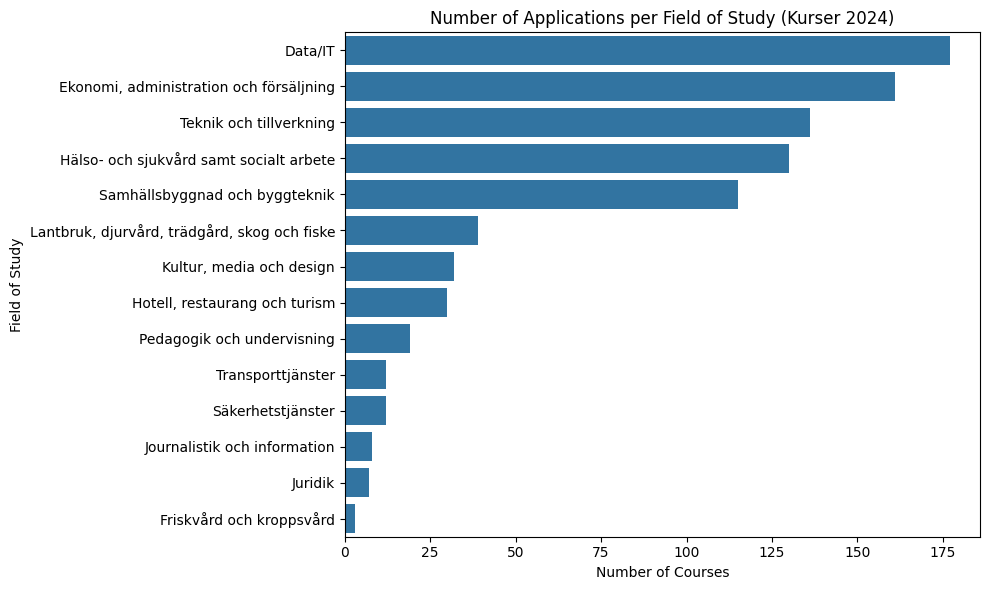

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y="Sökt utbildningsområde", data=df,
              order=df["Sökt utbildningsområde"].value_counts().index)
plt.title("Number of Applications per Field of Study (Kurser 2024)")
plt.xlabel("Number of Courses")
plt.ylabel("Field of Study")
plt.tight_layout()
plt.show()


# Analyze course application data grouped by education providers

In [8]:
provider_stats = df.groupby("Anordnare namn").agg({
    "Sökt antal platser 2024": "sum",
    "Utbildningsnamn": "count",
    "YH-poäng": "mean"
}).reset_index().rename(columns={
    "Utbildningsnamn": "Antal kurser",
    "Sökt antal platser 2024": "Totalt antal platser",
    "YH-poäng": "Genomsnittliga YH-poäng"
})

provider_stats.sort_values("Totalt antal platser", ascending=False).head(10)


,Anordnare namn,Totalt antal platser,Antal kurser,Genomsnittliga YH-poäng
159,YH Akademin AB,1500,45,42.555556
69,IHM Business School AB Göteborg,1450,30,44.500000
100,Medieinstitutet i Sverige AB,1047,23,36.739130
144,TUC Sweden AB - Yrkeshögskola,830,18,40.555556
105,Nackademin AB,671,18,26.111111
127,Stockholm School of Business,655,13,36.153846
48,Företagsuniversitetet AB,620,10,29.200000
6,Amsac AB,578,19,46.052632
82,KYH AB,562,16,24.062500
139,Sveriges Yrkeshögskola AB - Malmö Yrkeshögskola,560,8,73.750000


# Top 20 providers by applied seats 2024

In [9]:
import plotly.express as px

fig = px.bar(provider_stats.sort_values("Totalt antal platser", ascending=False).head(20),
             x="Anordnare namn", y="Totalt antal platser",
             hover_data=["Antal kurser", "Genomsnittliga YH-poäng"],
             title="Top 20 Providers by Applied Seats (Kurser 2024)")
fig.update_layout(xaxis_tickangle=-45)
fig.show()


 # applied places by region and provider course 2024


In [10]:
df_clean = df[df["Kommun"] != 'Se "Lista flera kommuner"']

fig = px.sunburst(df_clean,
                  path=["Län", "Kommun", "Anordnare namn"],
                  values="Sökt antal platser 2024",
                  title="Applied Places by Region and Provider (Kurser 2024)")
fig.show()


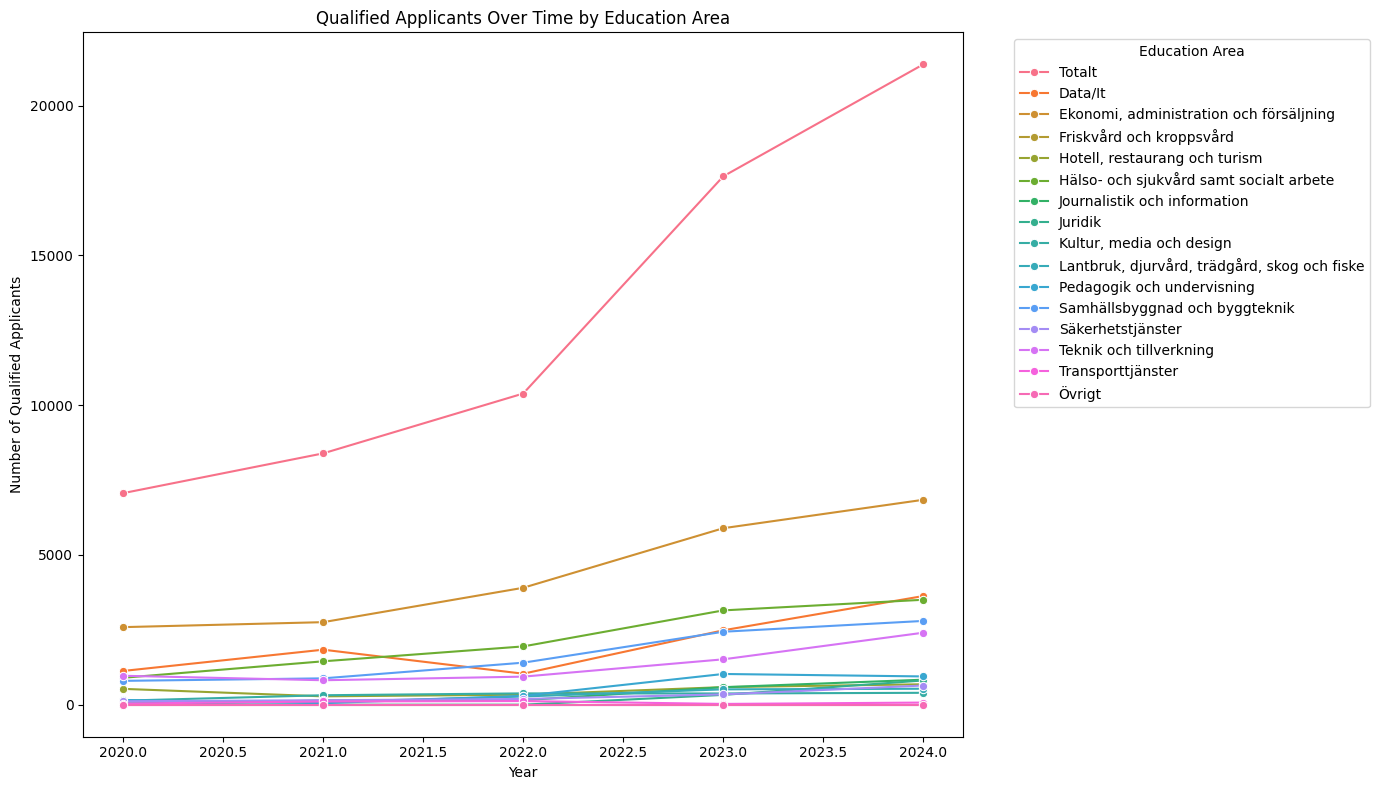

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_students = pd.read_csv("../data/student/antal_behoriga_sokande_kurser_kon_omrade_alder_2020_2024.csv", encoding="latin1")

# Filter relevant rows: total gender, all regions, total pace
mask = (
    (df_students["kön"] == "totalt") &
    (df_students["region (hemlän)"] == "Samtliga län") &
    (df_students["utbildningens studietakt"] == "Totalt")
)

df_filtered = df_students[mask]

# Melt years into a single column
df_melted = df_filtered.melt(
    id_vars=["utbildningsområde MYH"],
    value_vars=[
        "Antal behöriga sökande 2020",
        "Antal behöriga sökande 2021",
        "Antal behöriga sökande 2022",
        "Antal behöriga sökande 2023",
        "Antal behöriga sökande 2024"
    ],
    var_name="År",
    value_name="Antal behöriga"
)

# Clean year values
df_melted["År"] = df_melted["År"].str.extract(r"(\d{4})").astype(int)

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_melted, x="År", y="Antal behöriga", hue="utbildningsområde MYH", marker="o")
plt.title("Qualified Applicants Over Time by Education Area")
plt.xlabel("Year")
plt.ylabel("Number of Qualified Applicants")
plt.legend(title="Education Area", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
